 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [63]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")


# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [64]:
# Count nulls
whale_returns_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [65]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
2019-04-25,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [66]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.head()




,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [67]:
# Count nulls
algo_returns_df.isnull()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,False,False,True
2014-05-29,False,False,True
2014-05-30,False,False,True
2014-06-02,False,False,True
2014-06-03,False,False,True
...,...,...,...
2019-04-25,False,False,False
2019-04-26,False,False,False
2019-04-29,False,False,False


In [68]:
# Drop nulls
algo_returns_df.dropna()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [69]:
## S&P 500 Returns
#Read the SP500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [148]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# YOUR CODE HERE
sp500_history_df = pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)



#set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [149]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [150]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df
sp500_history_df.dtypes

#sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
#sp500_history_df
#sp500_history_df.dtypes
#sp500_history_df['']

Close    float64
dtype: object

In [180]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [181]:
# Drop nulls
sp500_daily_returns.dropna()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [184]:
# Rename Column
sp500_daily_returns.rename(columns={'Close': 'S&P daily returns'}, inplace=True)
sp500_daily_returns

,S&P daily returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [190]:
# Concatenate all DataFrames into a single DataFrame
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns",join="inner")
combined_returns_df
combined_returns_df.drop(columns=['Date'], inplace=True)
combined_returns_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P daily returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

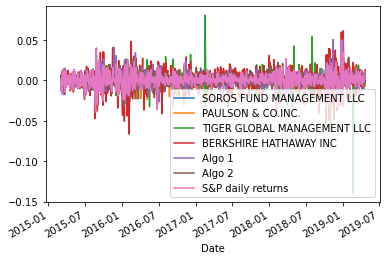

In [195]:
# Plot daily returns
combined_returns_df.plot()
#cumulative_returns = (1 + combined_returns_df).cumprod() - 1
#cumulative_returns.head()

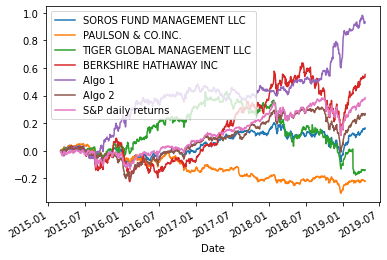

In [224]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns_df).cumprod() - 1
cumulative_returns.plot()

#Based on the cumulative Returns, the Algo 1 and Berkshire Heathaway funds outperforms the S&P500 returns.


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

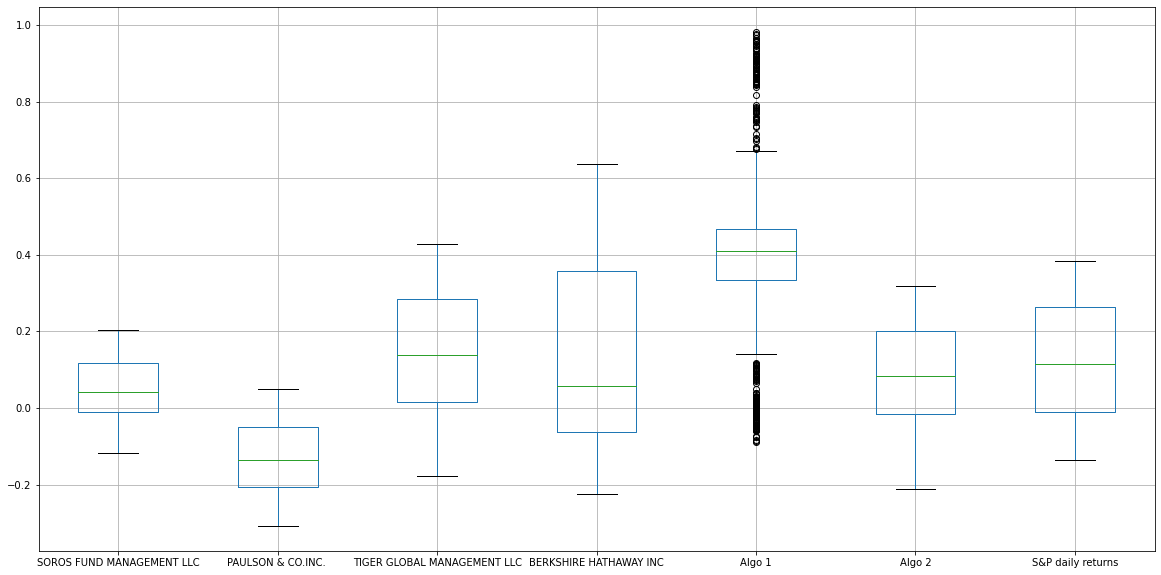

In [281]:
# Box plot to visually show risk
cumulative_returns.boxplot(figsize=[20, 10])

#BUSCAR EL BOX PLOT EN DOCUMENTATION EN PANDAS x AXIS Y AXIS 

In [236]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
#std_whale = whale_returns_df.std()
#std_whale

#std_algo = algo_returns_df.std()
#std_algo

#std_sp500 = sp500_daily_returns.std()
#std_sp500

all_funds_std = cumulative_returns.std()
all_funds_std

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
Algo 2                         0.131700
S&P daily returns              0.144448
dtype: float64

In [237]:
# Determine which portfolios are riskier than the S&P 500
# FORLOPP IF VALUE > SP500 
    #PRINT(CUMU)RETURNS.STD()
    

In [239]:
# Calculate the annualized standard deviation (252 trading days)
all_funds_annual_std = all_funds_std * np.sqrt(252)
all_funds_annual_std

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
Algo 2                         2.090678
S&P daily returns              2.293036
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

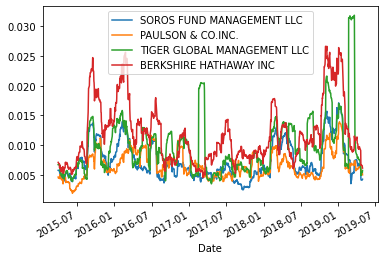

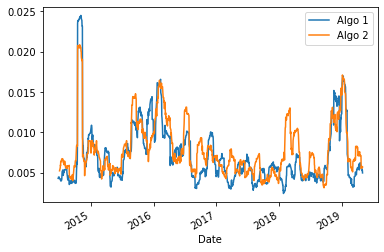

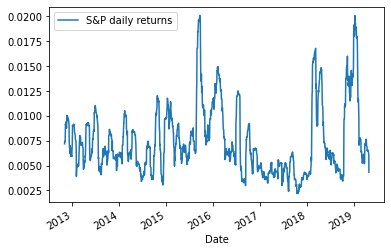

In [270]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
whale_returns_df.rolling(window=21).std().plot()
algo_returns_df.rolling(window=21).std().plot()
sp500_daily_returns.rolling(window=21).std().plot()

#Risk does not increase as sp500

In [273]:
# Construct a correlation table
combined_returns_df.corr(method = 'pearson')

# Algo 2 fund is closest to SP 500.
#np.max(combo_corr[:,6])
#print(np.max(combo_corr[:,6]))



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P daily returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P daily returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [282]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
cov_algo2_sp500 = combined_returns_df["Algo 2"].rolling(60).cov(combined_returns_df["S&P daily returns"])
cov_algo2_sp500

variance_sp500 = combined_returns_df["S&P daily returns"].rolling(60).var()
variance_sp500

algo2_beta = cov_algo2_sp500 / variance_sp500
algo2_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.910622
2019-04-17    0.923897
2019-04-18    0.925305
2019-04-22    0.926647
2019-04-23    0.922600
Length: 1043, dtype: float64

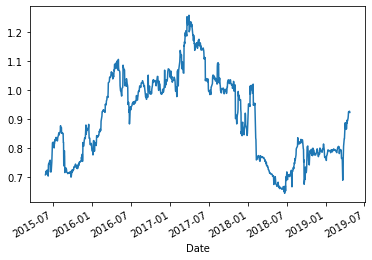

In [284]:
algo2_beta.plot()

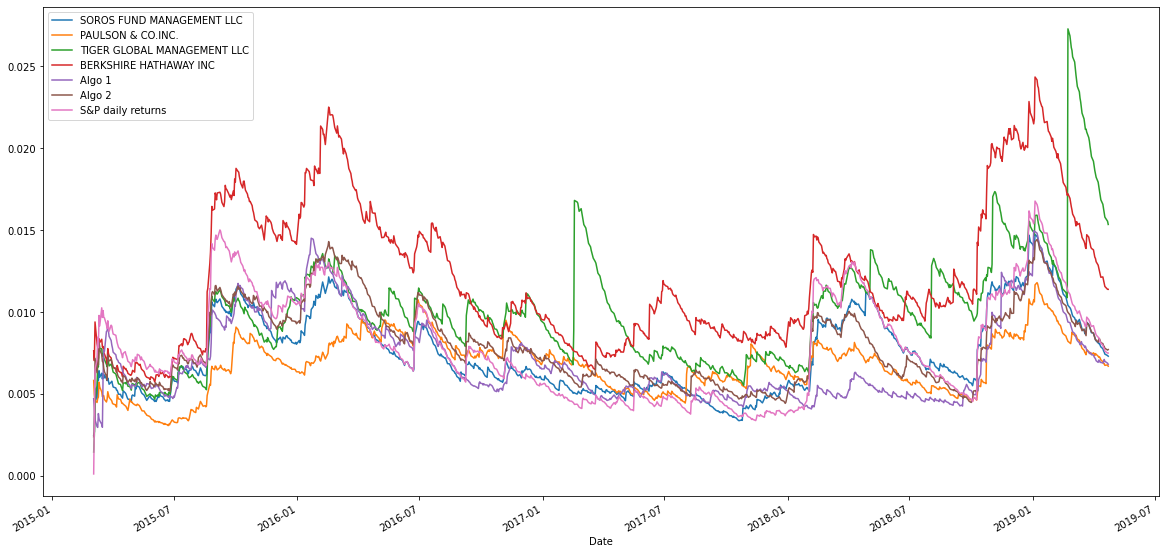

In [288]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_returns_df.ewm(halflife=21).std().plot(figsize=[20, 10])

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [295]:
# Calculate annualized Sharpe Ratios
sharpe_annual = (combined_returns_df.mean()*252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_annual


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P daily returns              0.648267
dtype: float64

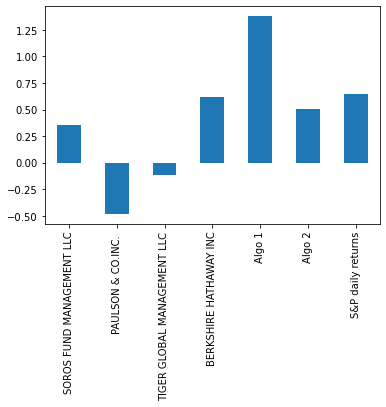

In [296]:
# Visualize the sharpe ratios as a bar plot
sharpe_annual.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [2]:
# Read the first stock
csvpath = Path("felipe_stocks.csv")

In [11]:
# Read the second stock
felipe_df = pd.read_csv(csvpath)
felipe_df.head()


,Date,Close,Date.1,Close.1,Date.2,Close.2
0,9/3/2019 16:00:00,581.00,9/3/2019 16:00:00,1789.84,9/3/2019 16:00:00,172.41
1,9/4/2019 16:00:00,590.00,9/4/2019 16:00:00,1800.62,9/4/2019 16:00:00,174.33
2,9/5/2019 16:00:00,605.69,9/5/2019 16:00:00,1840.72,9/5/2019 16:00:00,178.94
3,9/6/2019 16:00:00,597.79,9/6/2019 16:00:00,1833.51,9/6/2019 16:00:00,176.69
4,9/9/2019 16:00:00,571.13,9/9/2019 16:00:00,1831.35,9/9/2019 16:00:00,177.78


In [12]:
# Read the third stock
felipe_df.drop(columns=["Date.1", "Date.2"], inplace=True)
felipe_df.head()

,Date,Close,Close.1,Close.2
0,9/3/2019 16:00:00,581.00,1789.84,172.41
1,9/4/2019 16:00:00,590.00,1800.62,174.33
2,9/5/2019 16:00:00,605.69,1840.72,178.94
3,9/6/2019 16:00:00,597.79,1833.51,176.69
4,9/9/2019 16:00:00,571.13,1831.35,177.78


In [18]:


felipe_df.rename(columns = {"Close": "MELI", "Close.1": "AMZN", "Close.2": "BABA"}, inplace=True)
felipe_df.set_index('Date', inplace = True)
felipe_df

,MELI,AMZN,BABA
Date,,,
9/3/2019 16:00:00,581.00,1789.84,172.41
9/4/2019 16:00:00,590.00,1800.62,174.33
9/5/2019 16:00:00,605.69,1840.72,178.94
9/6/2019 16:00:00,597.79,1833.51,176.69
9/9/2019 16:00:00,571.13,1831.35,177.78
...,...,...,...
8/24/2020 16:00:00,1212.09,3307.46,276.02
8/25/2020 16:00:00,1224.00,3346.49,286.00
8/26/2020 16:00:00,1215.93,3441.85,291.96


In [31]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [32]:
# Reset the index
# YOUR CODE HERE

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Drop Nulls
# YOUR CODE HERE

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

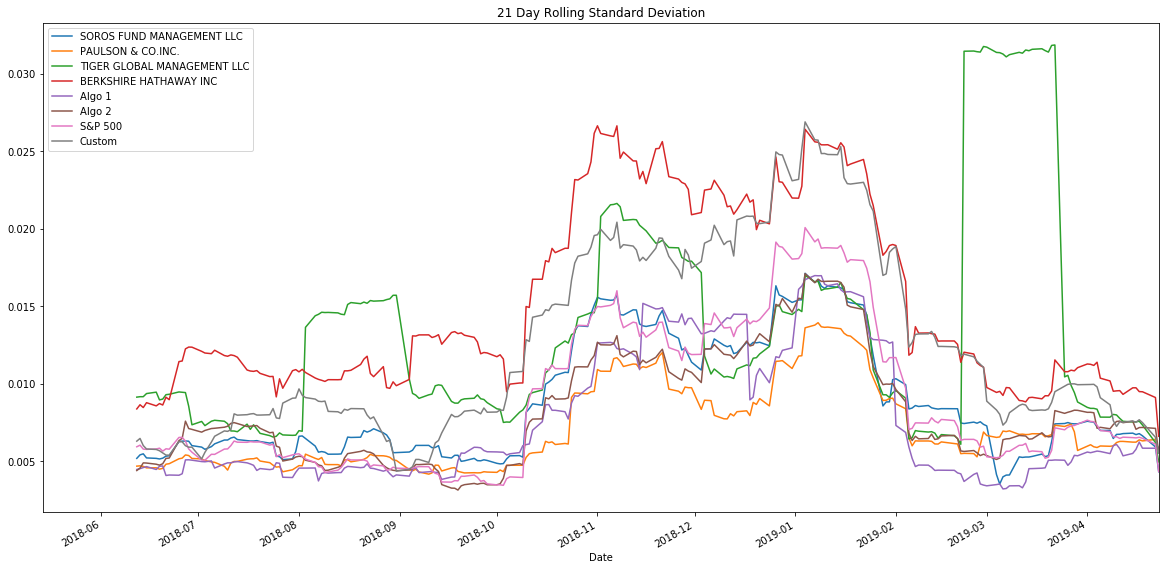

In [39]:
# Rolling
# YOUR CODE HERE

In [40]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

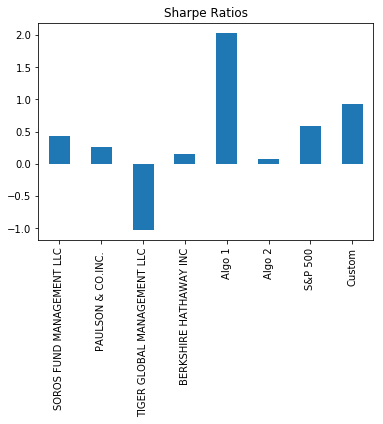

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [42]:
# Create a correlation analysis
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


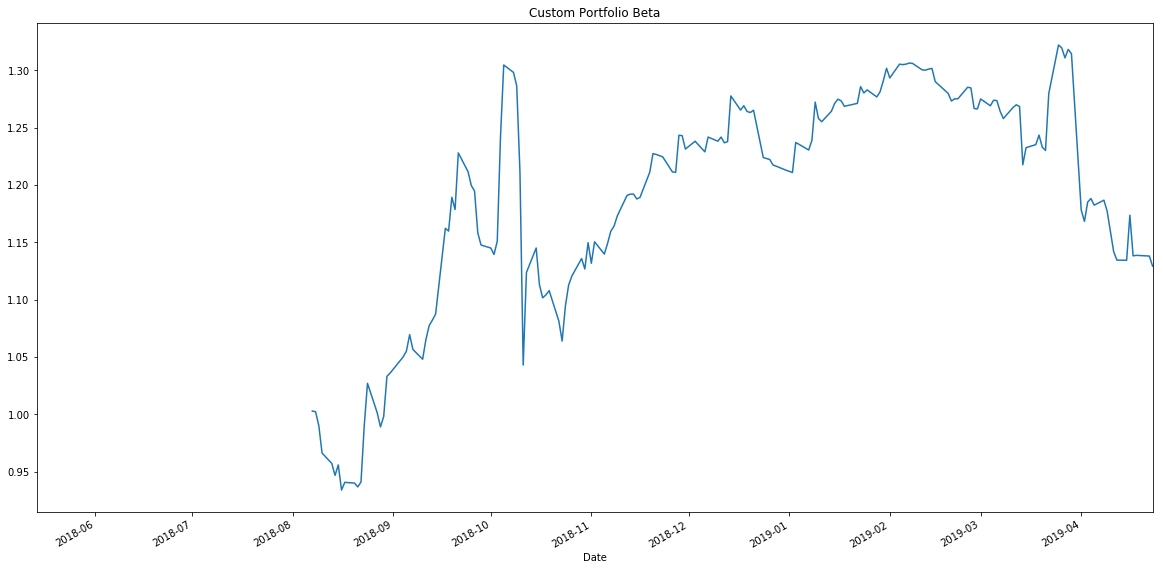

In [43]:
# Beta
# YOUR CODE HERE